In [ ]:
# Feature Engineering for converting Non-Linear data to Linear data

In [ ]:
#Importing the libraries

In [1]:
from sklearn.datasets.samples_generator import make_circles,make_moons
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn

In [ ]:
#Importing the dataset

In [2]:
X_circle, y_circle = make_circles(n_samples=20000)
y_circle=y_circle.reshape(20000,1)
dataset_circle= np.concatenate((X_circle,y_circle),axis=1)
df_circle=pd.DataFrame(dataset_circle,columns=('feature_1','feature_2','labels'))

In [ ]:
#Visualization of data

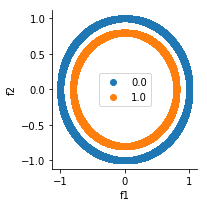

In [3]:
sn.FacetGrid(data=df_circle,hue='labels',size=3).map(plt.scatter,'feature_1','feature_2')
plt.legend()
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

In [ ]:
#Observations
'''
We can see that data is non linear and hence cannot be modelled using Logistic Regression.
Constraint is to use Logistic Regression since its time and Space Complexity is Low and can be used in low latency Systems
'''

In [ ]:
#Feature Engineering
'''
Lets try to transform the data from f1 and f2 space to f1' and f2' space using Feature Engineering 
'''

In [4]:
df_circle_new=np.square(df_circle)

In [5]:
df_circle_new.head()

,feature_1,feature_2,labels
0,0.696265,0.303735,0.0
1,0.999842,0.000158,0.0
2,0.067092,0.932908,0.0
3,0.289885,0.350115,1.0
4,0.055787,0.584213,1.0


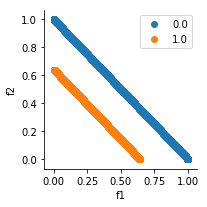

In [6]:
sn.FacetGrid(data=df_circle_new,hue='labels',size=3).map(plt.scatter,'feature_1','feature_2')
plt.legend()
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

In [ ]:
# Now we can observe the data is linealy seperable and hence logistic regression can be successfully used

In [ ]:
#Generating XOR Data

In [7]:
data = np.genfromtxt('demo_data/7.xor.csv', delimiter=',')

In [8]:
df_data=pd.DataFrame(data,columns=('feature_1','feature_2','labels'))

In [9]:
df_data.head()

,feature_1,feature_2,labels
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


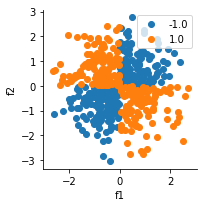

In [10]:
sn.FacetGrid(data=df_data,hue='labels',size=3).map(plt.scatter,'feature_1','feature_2')
plt.legend()
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

In [11]:
'''
Here we create feature 3 such that f3=f1*f2
'''
f3 = df_data.feature_1 * df_data.feature_2

In [12]:
df_data['feature_3']=f3

In [13]:
df_data.head()

,feature_1,feature_2,labels,feature_3
0,1.764052,0.400157,-1.0,0.705898
1,0.978738,2.240893,-1.0,2.193247
2,1.867558,-0.977278,1.0,-1.825123
3,0.950088,-0.151357,1.0,-0.143803
4,-0.103219,0.410599,1.0,-0.042382


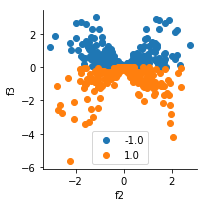

In [14]:
'''
Now we consider feature 3 (f1*f2) and feature 2 and neglect feature 1 during building the model
'''
sn.FacetGrid(data=df_data,hue='labels',size=3).map(plt.scatter,'feature_2','feature_3')
plt.legend()
plt.xlabel('f2')
plt.ylabel('f3')
plt.show()

In [ ]:
# Thus we can observe that non linear XOR Data with help of feature engineering is converted to linearly seperable data

In [15]:
X_moon, y_moon = make_moons(n_samples=20000)
y_moon=y_moon.reshape(20000,1)
dataset_moon= np.concatenate((X_moon,y_moon),axis=1)
df_moon=pd.DataFrame(dataset_moon,columns=('feature_1','feature_2','labels'))

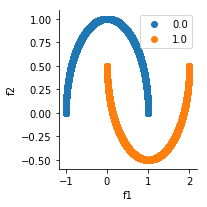

In [16]:
sn.FacetGrid(data=df_moon,hue='labels',size=3).map(plt.scatter,'feature_1','feature_2')
plt.legend()
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

In [17]:
df_moon.head()

,feature_1,feature_2,labels
0,1.482486,-0.375904,1.0
1,-0.665480,0.746416,0.0
2,1.856690,-0.015832,1.0
3,1.941718,0.163596,1.0
4,-0.955692,0.294369,0.0


In [18]:
'''
Creating new features f3 and f4 from f1 and f2
'''
df_moon['feature_3'] = df_moon['feature_2']**6
df_moon['feature_4'] = df_moon['feature_1']**6

In [19]:
df_moon.head()

,feature_1,feature_2,labels,feature_3,feature_4
0,1.482486,-0.375904,1.0,2.821369e-03,10.615572
1,-0.665480,0.746416,0.0,1.729355e-01,0.086858
2,1.856690,-0.015832,1.0,1.574958e-11,40.967152
3,1.941718,0.163596,1.0,1.917029e-05,53.594028
4,-0.955692,0.294369,0.0,6.506593e-04,0.761916


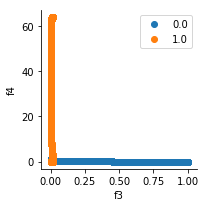

In [20]:
'''
Visualization using feature 3 and feature 4
'''
sn.FacetGrid(data=df_moon,hue='labels',size=3).map(plt.scatter,'feature_3','feature_4')
plt.legend()
plt.xlabel('f3')
plt.ylabel('f4')
plt.show()